##Problem statement:
To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Defining the path for train and test images
# Update the paths of the train and test dataset
train_dir = '/content/drive/My Drive/Data/Train'
test_dir = '/content/drive/My Drive/Data/Test'

In [4]:
import pathlib

# Define the correct path for the training dataset
data_dir_train = pathlib.Path("/content/drive/My Drive/Train")
data_dir_test = pathlib.Path("/content/drive/My Drive/Test")

# Verify that the path exists
print(data_dir_train.exists())  # Should return True if the path is correct
print(data_dir_test.exists())   # Should return True if the path is correct


True
True


In [5]:
# Printing the count of images in each directory
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)


Train images:	 2239
Test images:	 118


# Loading data using Keras. preprocessing


### Data Reading/Data Understanding
#### Dataset out of images
#### Defining Parameters for loader

In [6]:
batch_size=32
img_height=180
img_width=180

In [7]:
# Spliting data - 80% for training and 20% for validating
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


## Visualizing and Exploring the data

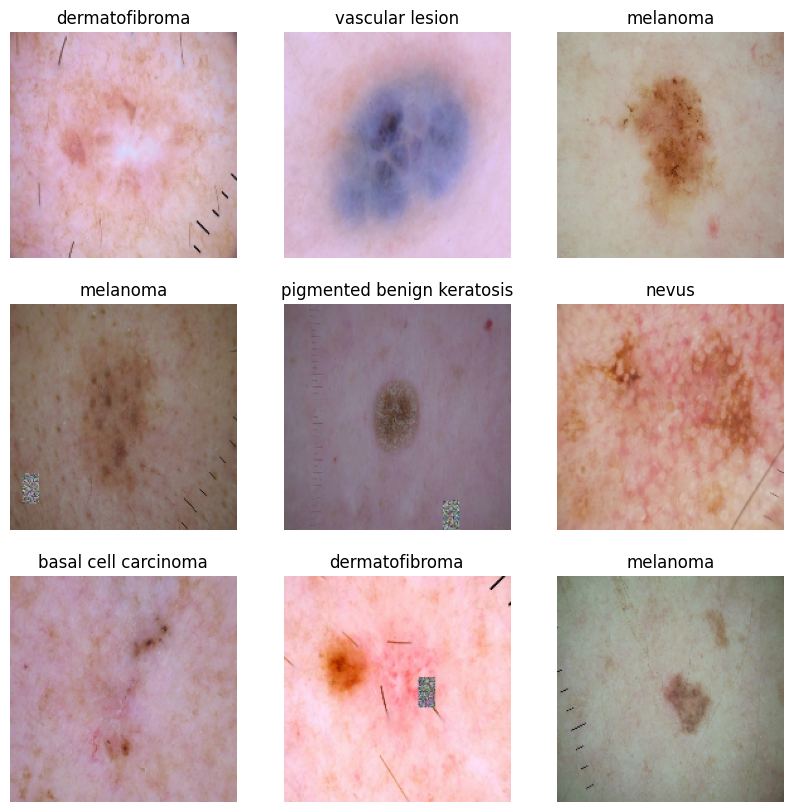

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

- Batch of 32 Images of shape 180x180x3

In [11]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Model Building & training

In [12]:
#Train the Model
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pathlib

# Define your image height and width
img_height = 150  # Set to your image height
img_width = 150   # Set to your image width
num_classes = 9   # Number of classes in your dataset

# Define the directory paths
data_dir_train = pathlib.Path("/content/drive/My Drive/Train")
data_dir_test = pathlib.Path("/content/drive/My Drive/Test")

# Set up ImageDataGenerators for loading images
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalize pixel values
test_datagen = ImageDataGenerator(rescale=1./255)   # Normalize pixel values

# Load training images
train_ds = train_datagen.flow_from_directory(
    str(data_dir_train),  # Use string for Path object
    target_size=(img_height, img_width),  # Resize images
    batch_size=32,
    class_mode='sparse'  # Use 'sparse' for integer labels
)

# Load validation images (assuming your test directory is used for validation)
val_ds = test_datagen.flow_from_directory(
    str(data_dir_test),  # Use string for Path object
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='sparse'  # Use 'sparse' for integer labels
)

# Define the model architecture
model = Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),  # Normalize pixel values
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')  # Use softmax for multi-class classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # Loss function for integer labels
              metrics=['accuracy'])  # Metric to monitor

# Print the model summary
model.summary()



Found 6739 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 150, 150, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 20736)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,654,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,679,081 (10.22 MB)

 Trainable params: 2,679,081 (10.22 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Train the Model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


211/211 ━━━━━━━━━━━━━━━━━━━━ 1601s 7s/step - accuracy: 0.1446 - loss: 2.1900 - val_accuracy: 0.1356 - val_loss: 2.1835
Epoch 2/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.1375 - loss: 2.1833 - val_accuracy: 0.1356 - val_loss: 2.1816
Epoch 3/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 254s 1s/step - accuracy: 0.1408 - loss: 2.1814 - val_accuracy: 0.1356 - val_loss: 2.1740
Epoch 4/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.1482 - loss: 2.1738 - val_accuracy: 0.1356 - val_loss: 2.1759
Epoch 5/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 218s 1s/step - accuracy: 0.1367 - loss: 2.1803 - val_accuracy: 0.1356 - val_loss: 2.1739
Epoch 6/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 259s 1s/step - accuracy: 0.1318 - loss: 2.1813 - val_accuracy: 0.1356 - val_loss: 2.1749
Epoch 7/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 267s 1s/step - accuracy: 0.1343 - loss: 2.1783 - val_accuracy: 0.1356 - val_loss: 2.1729
Epoch 8/20
211/211 ━━━━━━━━━━━━━━━━━━━━ 216s 1s/step - accuracy: 0.1402 - loss: 2.1789 - val_accuracy: 0.13

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your train and test directories
train_dir = '/content/drive/MyDrive/Train'
test_dir = '/content/drive/MyDrive/Test'

# Data generators for loading images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Adjust based on your model's input size
    batch_size=32,
    class_mode='categorical'  # Adjust based on your labels (e.g., 'categorical' for multi-class classification)
)

val_data = val_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 6739 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


Found 6739 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 487s 2s/step - accuracy: 0.2991 - loss: 1.8754 - val_accuracy: 0.3729 - val_loss: 1.9655
Epoch 2/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 482s 2s/step - accuracy: 0.5004 - loss: 1.3407 - val_accuracy: 0.3305 - val_loss: 2.0861
Epoch 3/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 499s 2s/step - accuracy: 0.5819 - loss: 1.1328 - val_accuracy: 0.3729 - val_loss: 2.3903
Epoch 4/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 497s 2s/step - accuracy: 0.6591 - loss: 0.9218 - val_accuracy: 0.3644 - val_loss: 3.1278
Epoch 5/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 444s 2s/step - accuracy: 0.7477 - loss: 0.7078 - val_accuracy: 0.3390 - val_loss: 3.3588
Epoch 6/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 468s 2s/step - accuracy: 0.8100 - loss: 0.5252 - val_accuracy: 0.3475 - val_loss: 4.2667
Epoch 7/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 479s 2s/step - accuracy: 0.8553 - loss: 0.4010 - val_accuracy: 0.3983 - val_loss: 4.1111
Epoch 8/10
211/211 ━━━━━━━━━━━━━━━━━━━━ 501s 2s/step - accuracy: 0.8993 - loss: 0.2904 - val_accu

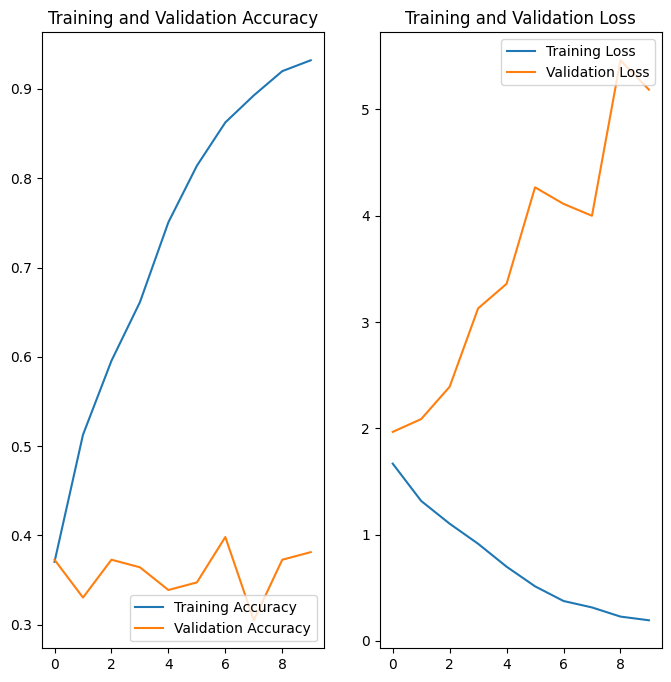

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Paths to your train and test directories
train_dir = '/content/drive/MyDrive/Train'
test_dir = '/content/drive/MyDrive/Test'

# Data generators for loading images
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(9, activation='softmax')  # 9 classes in your dataset
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
epochs = 10
history = model.fit(train_data, epochs=epochs, validation_data=val_data)

# Plotting training results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


The plot shows that the training accuracy increases linearly over time, whereas validation accuracy stalled ~55-60% in training process, Also the differecne in Training and validation accuracy points to overfitting.

In [20]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


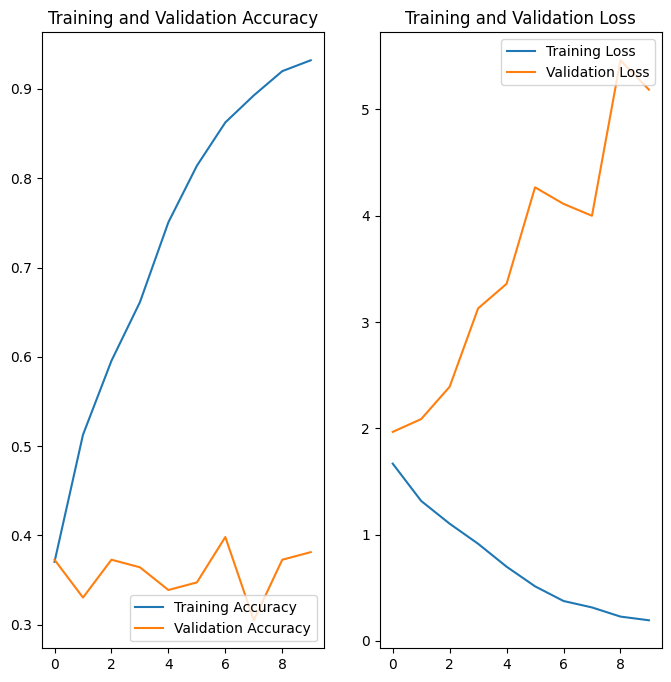

In [21]:
# Visulazing the result
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Ensure epochs_range matches the length of the accuracy/loss arrays
epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()


With change in model the overfiiting redueced to a bit, howevere there still some differecnes



In [22]:
# Finding distribution of class in trianing dataset
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list)


2239

In [23]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df


,Path,Label
0,/content/drive/My Drive/Train/vascular lesion/...,vascular lesion
1,/content/drive/My Drive/Train/vascular lesion/...,vascular lesion
2,/content/drive/My Drive/Train/vascular lesion/...,vascular lesion
3,/content/drive/My Drive/Train/vascular lesion/...,vascular lesion
4,/content/drive/My Drive/Train/vascular lesion/...,vascular lesion
...,...,...
2234,/content/drive/My Drive/Train/actinic keratosi...,actinic keratosis
2235,/content/drive/My Drive/Train/actinic keratosi...,actinic keratosis
2236,/content/drive/My Drive/Train/actinic keratosi...,actinic keratosis
2237,/content/drive/My Drive/Train/actinic keratosi...,actinic keratosis


Class=8, n=139 (6.208%)
Class=4, n=357 (15.945%)
Class=7, n=181 (8.084%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=1, n=376 (16.793%)
Class=0, n=114 (5.092%)


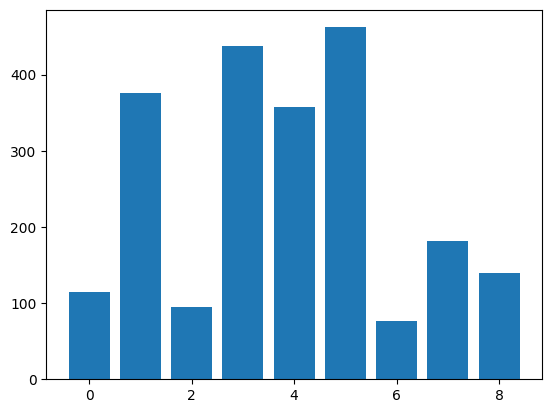

In [24]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()



*   Class 6 and 2 have least number of sampels

*   Class 5 and 3 dominated in terms of image percentage. This class imbalance need to be rectified to get more accuarte predictions





In [27]:
!pip install Augmentor


In [28]:
import Augmentor

# Path to your training dataset
path_to_training_dataset = '/content/drive/MyDrive/Train/'

# Class names based on your dataset
class_names = [
    'vascular lesion', 'nevus', 'squamous cell carcinoma', 'dermatofibroma',
    'melanoma', 'pigmented benign keratosis', 'seborrheic keratosis',
    'basal cell carcinoma', 'actinic keratosis'
]

# Loop through each class and apply augmentation
for class_name in class_names:
    # Create an augmentation pipeline for each class folder
    p = Augmentor.Pipeline(path_to_training_dataset + class_name)

    # Apply rotation with the specified probability and degrees
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

    # Add 500 samples per class
    p.sample(500)


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78CB31EC7670>: 100%|██████████| 500/500 [00:25<00:00, 19.77 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x78CB31A13F70>: 100%|██████████| 500/500 [01:34<00:00,  5.27 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78CB380EB550>: 100%|██████████| 500/500 [00:26<00:00, 18.84 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78CB274CA230>: 100%|██████████| 500/500 [00:23<00:00, 20.84 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=771x750 at 0x78CB28746B30>: 100%|██████████| 500/500 [01:40<00:00,  4.99 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/MyDrive/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78CB38347430>: 100%|██████████| 500/500 [00:27<00:00, 18.19 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x78CB276B4340>: 100%|██████████| 500/500 [00:54<00:00,  9.23 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78CB3840AD40>: 100%|██████████| 500/500 [00:28<00:00, 17.86 Samples/s]


Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x78CB276B78E0>: 100%|██████████| 500/500 [00:28<00:00, 17.49 Samples/s]


In [29]:
import os
print(os.getcwd())


/content


In [31]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)


9000


In [32]:
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list_new


['/content/drive/My Drive/Train/vascular lesion/output/vascular lesion_original_ISIC_0029742.jpg_c227b08f-2c08-44b6-9c94-24cc749aa565.jpg',
 '/content/drive/My Drive/Train/vascular lesion/output/vascular lesion_original_ISIC_0032614.jpg_1863a5ba-be4c-45bf-a741-55634dd0cf99.jpg',
 '/content/drive/My Drive/Train/vascular lesion/output/vascular lesion_original_ISIC_0027790.jpg_2009a3cb-f05b-4aea-a83e-05f9888b9c06.jpg',
 '/content/drive/My Drive/Train/vascular lesion/output/vascular lesion_original_ISIC_0030070.jpg_a9315e45-a7e1-4926-8fa2-0682dad97f10.jpg',
 '/content/drive/My Drive/Train/vascular lesion/output/vascular lesion_original_ISIC_0031706.jpg_a8442853-2d40-4a2a-ab05-584b60d478ed.jpg',
 '/content/drive/My Drive/Train/vascular lesion/output/vascular lesion_original_ISIC_0026876.jpg_3d03a121-c1f3-4bf7-8ca2-ad244beddbdc.jpg',
 '/content/drive/My Drive/Train/vascular lesion/output/vascular lesion_original_ISIC_0029877.jpg_8b55d5d0-9f22-4046-892d-319c108b4f62.jpg',
 '/content/drive/My 

In [33]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new


['vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',
 'vascular lesion',


In [34]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))


In [36]:
import pandas as pd

# Create df2 from the dictionary
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])

# Append df2 to original_df using pd.concat()
new_df = pd.concat([original_df, df2], ignore_index=True)


In [37]:
new_df['Label'].value_counts()


,count
Label,
pigmented benign keratosis,1462
melanoma,1438
basal cell carcinoma,1376
nevus,1357
squamous cell carcinoma,1181
vascular lesion,1139
actinic keratosis,1114
dermatofibroma,1095
seborrheic keratosis,1077


In [38]:
# Train the model data  created using augmentor
batch_size = 32
img_height = 180
img_width = 180
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training', ## Todo choose the correct parameter value, so that only training data is refered to
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 11239 files belonging to 9 classes.
Using 8992 files for training.


In [39]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 11239 files belonging to 9 classes.
Using 2247 files for validation.


In [42]:
import tensorflow as tf
from tensorflow.keras import layers, Sequential

# Set AUTOTUNE for efficient data loading
AUTOTUNE = tf.data.AUTOTUNE

# Data pipeline: caching, shuffling, and prefetching
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Define the CNN model
model = Sequential([
  layers.Rescaling(1./255),  # Use the updated API without 'experimental'
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)  # Ensure num_classes is defined appropriately
])


In [43]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [44]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 443s 1s/step - accuracy: 0.2637 - loss: 1.9599 - val_accuracy: 0.4593 - val_loss: 1.3765
Epoch 2/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 340s 1s/step - accuracy: 0.5094 - loss: 1.3061 - val_accuracy: 0.5567 - val_loss: 1.1834
Epoch 3/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 352s 1s/step - accuracy: 0.6351 - loss: 0.9883 - val_accuracy: 0.6498 - val_loss: 0.9425
Epoch 4/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.7076 - loss: 0.7812 - val_accuracy: 0.7165 - val_loss: 0.8136
Epoch 5/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 351s 1s/step - accuracy: 0.7898 - loss: 0.5991 - val_accuracy: 0.7726 - val_loss: 0.6769
Epoch 6/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 385s 1s/step - accuracy: 0.8565 - loss: 0.4118 - val_accuracy: 0.7886 - val_loss: 0.6161
Epoch 7/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 339s 1s/step - accuracy: 0.8870 - loss: 0.3145 - val_accuracy: 0.8046 - val_loss: 0.6610
Epoch 8/20
281/281 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.9090 - loss: 0.2584 - val_accu

Training Accuracy Length: 20
Validation Accuracy Length: 20
Training Loss Length: 20
Validation Loss Length: 20


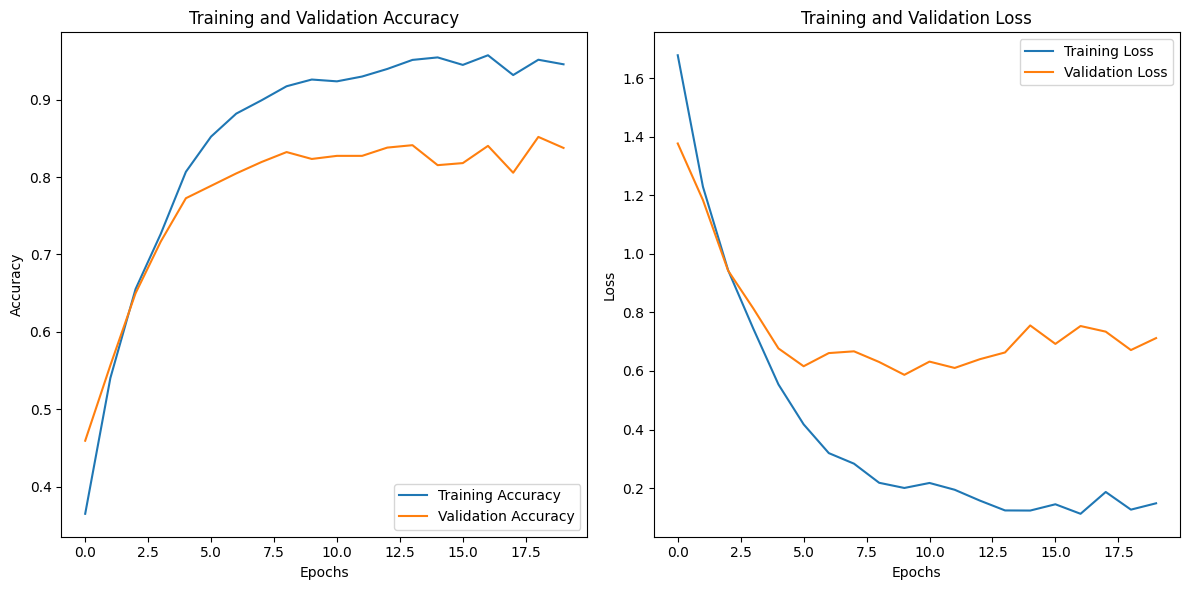

In [45]:
import matplotlib.pyplot as plt

# Assuming you have trained your model and have the history object
# For example, after model.fit(...)
# history = model.fit(...)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Print lengths of each metric to help debug
print(f"Training Accuracy Length: {len(acc)}")
print(f"Validation Accuracy Length: {len(val_acc)}")
print(f"Training Loss Length: {len(loss)}")
print(f"Validation Loss Length: {len(val_loss)}")

# Set epochs_range to match the length of your accuracy/loss arrays
epochs_range = range(len(acc))  # Ensure this matches the length of accuracy and loss arrays

plt.figure(figsize=(12, 6))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.tight_layout()  # Adjust the layout for better spacing
plt.show()




*   IAgumentation overcomes the problem of overfitting

*   Solving the class imbalance problem removes the underfititng


